In [1]:
library(tidyverse)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## **Group 2 Project report:**
Pushya Jain, Kelly Tang, Mayank Verma
Intro question: **Can the various chemical attributes determine the quality score of the wine pre-emptively?** Applicable for businesses such as wineries and other industry partners who can use this data analysis to see which wines are the best quality depending on the included attributes and then use it for further research into what wines should be on their shelves etc

## **Expected outcomes and significance:**
What do you expect to find? Relationships between certain chemical attributes of the wine affecting the wine quality score
Impact: Using the classification to immediately assign a quality score to wines based on known attributes, narrowing down the searches, acting as a quick way to predict the quality score without having to manually evaluate the data.
The chemical conditions to create a wine with the best quality score can be calculated quickly beforehand instead of trial and error to figure it out which can help several wineries out.
Future questions include what further research can be done to apply this data analysis to compare the popularity of certain wines and how can wineries adjust their business model and inventory to account for the classification of better quality wines?
The classifier could be adapted further (if more data and attributes is provided) to classify the type of wine too. 

Why use classifcation instead of regression: bc they are discrete values, we can jusge the accuracy because we have the exact values in the testing data and we do not have to rely on our rmse or rmspe.

## **Reading and Mutating the Data**
We removed ID and quality variables because it is not useful to our analysis.
We will do forward selection to further improve accuracy later. We will turn our target variable (wine quality score) into factor after the data visualisation


In [2]:
set.seed(5)

wine <- read_csv("WineQT.csv")
colnames(wine) <- colnames(wine) %>% make.names()

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



## **Choosing predictors and Target variables**

Based on our **sources**, the main chemical attributes of wines that affect its quality score are based on its acidity/pH, sulfur oxides, polysachhorides and the alcohol.

Based on this finding, the predictors chosen for our classification are: fixed acidity, volatile acidity, citric acidity, residual sugar, free sulfur dioxides, total sulfur dioxide, pH and alcohol. 
The predictors are chosen based on all attributes that relate with acidity (including pH), sugar which we assume correlates with the polysachhorides in the wine that **study** talks about and the alcohol level.

Also as we are tryng to predict the quality of the wine, the target variable is based on what we are trying to predict and it will be quality of the wine score.

This can also be reflected in the code below where we have selected all the predictors and the target variable in the data set by removing all the irrelevant seeming predictors.

In [3]:
wine <- wine %>% select(-Id,-density,-sulphates,-chlorides)
wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,free.sulfur.dioxide,total.sulfur.dioxide,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.700,0.00,1.9,11,34,3.51,9.4,5
7.8,0.880,0.00,2.6,25,67,3.20,9.8,5
7.8,0.760,0.04,2.3,15,54,3.26,9.8,5
11.2,0.280,0.56,1.9,17,60,3.16,9.8,6
7.4,0.700,0.00,1.9,11,34,3.51,9.4,5
7.4,0.660,0.00,1.8,13,40,3.51,9.4,5
7.9,0.600,0.06,1.6,15,59,3.30,9.4,5
7.3,0.650,0.00,1.2,15,21,3.39,10.0,7
7.8,0.580,0.02,2.0,9,18,3.36,9.5,7


## **Creating Data Visualisation** 
Line graphs are made with wine score on the x-xais and the values of attributes on the y-axis.
This is to notice whether the values of the attributes are different for each wine score or not as the those attributes that vary with wine score will be more helpful to classify the wine score itself. 
## Sample Visualization for different predictors present

`summarise()` regrouping output by 'attributes' (override with `.groups` argument)



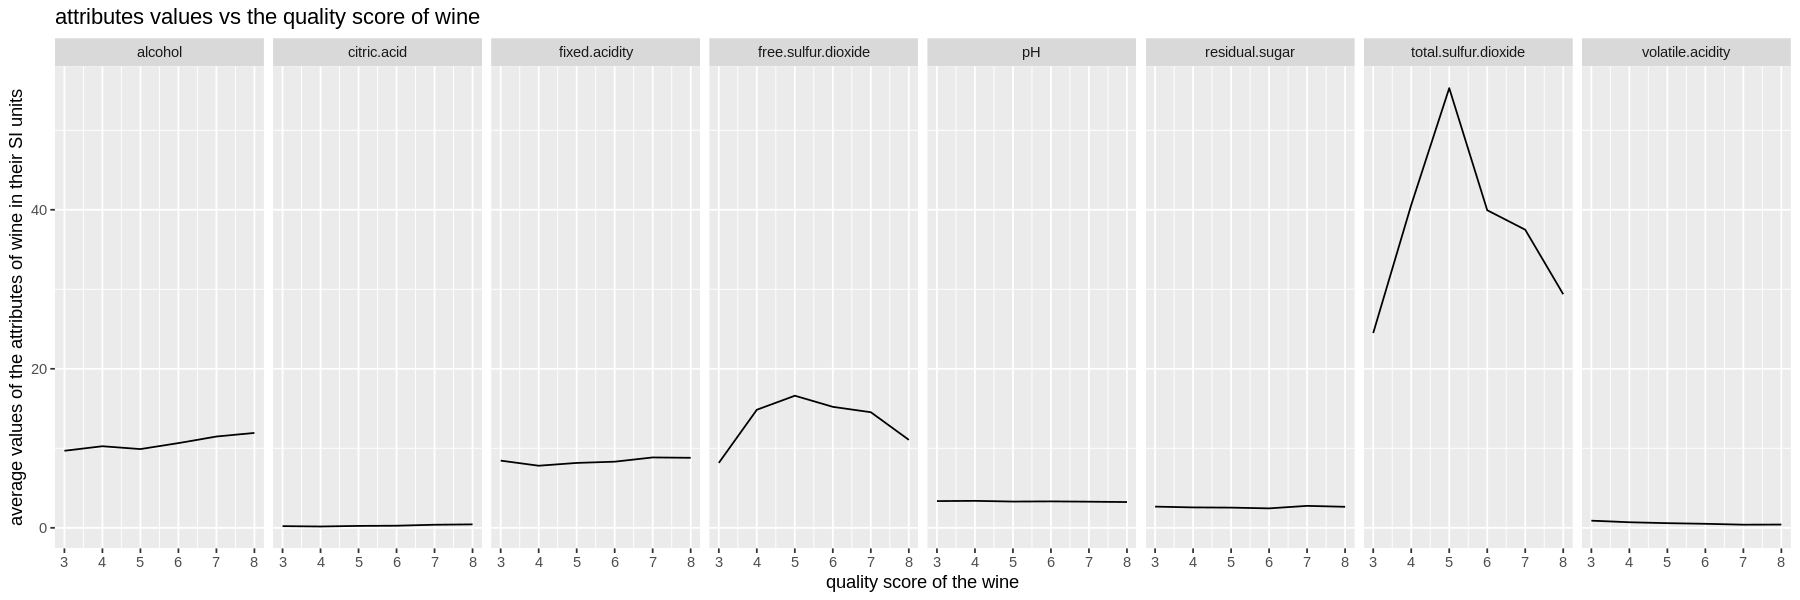

In [4]:
set.seed(5)
wine_longer <- pivot_longer(wine,
                           cols= fixed.acidity:alcohol,
                           names_to = "attributes",
                           values_to = "values") %>%
                            group_by(attributes, quality) %>%
                            summarise(values = mean(values))

options(repr.plot.height = 5, repr.plot.width = 15)

wine_plot <- wine_longer %>% 
            ggplot(aes(x  = quality, y = values)) + geom_line() + 
            facet_grid(. ~ attributes) + 
            labs (x = "quality score of the wine",
                 y = "average values of the attributes of wine in their SI units") +
            ggtitle("attributes values vs the quality score of wine")

wine_plot 


## **Preliminary Exploratory Data Analysis**
The graph was converted into a pivot_longer graph and then using the facet_grid function multiple line graphs were generated for different attributes. The quality of wine is on the x-axis and the average value of the attributes is the y-axis. Those attributes that have a change in the average attribute values (graphs that have don’t have a gradient of 0 by eye) will be chosen because that means the attributes have a correlation with the quality of the wine.
Predictors will be used to classify the wine score and those variables that are the same for all the wine scores will most likely not help the model.
Based on this, the predictors chosen are:
alcohol,
fixed acidity,
free sulfur dioxide,
and total sulfur dioxide.
The predictors may be rechosen based on the forward selection method later on for improving the accuracy of the model. 

However, there is still a problem with the above graph as it does not show all the changes in the attributes to scale as some of attributes change by a factor of 10 whereas other only hcange by a factor of 1. In order to fix that, we will graph them individually below and notice if there are any changes. However, the data is still going to be mutated to graph a mean against of the quality scores against the attributes. However, this would be done for just the values that seem to have a gradient of 0 in the graph above: citric acid, pH, residual sugar and volatile acidity.

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



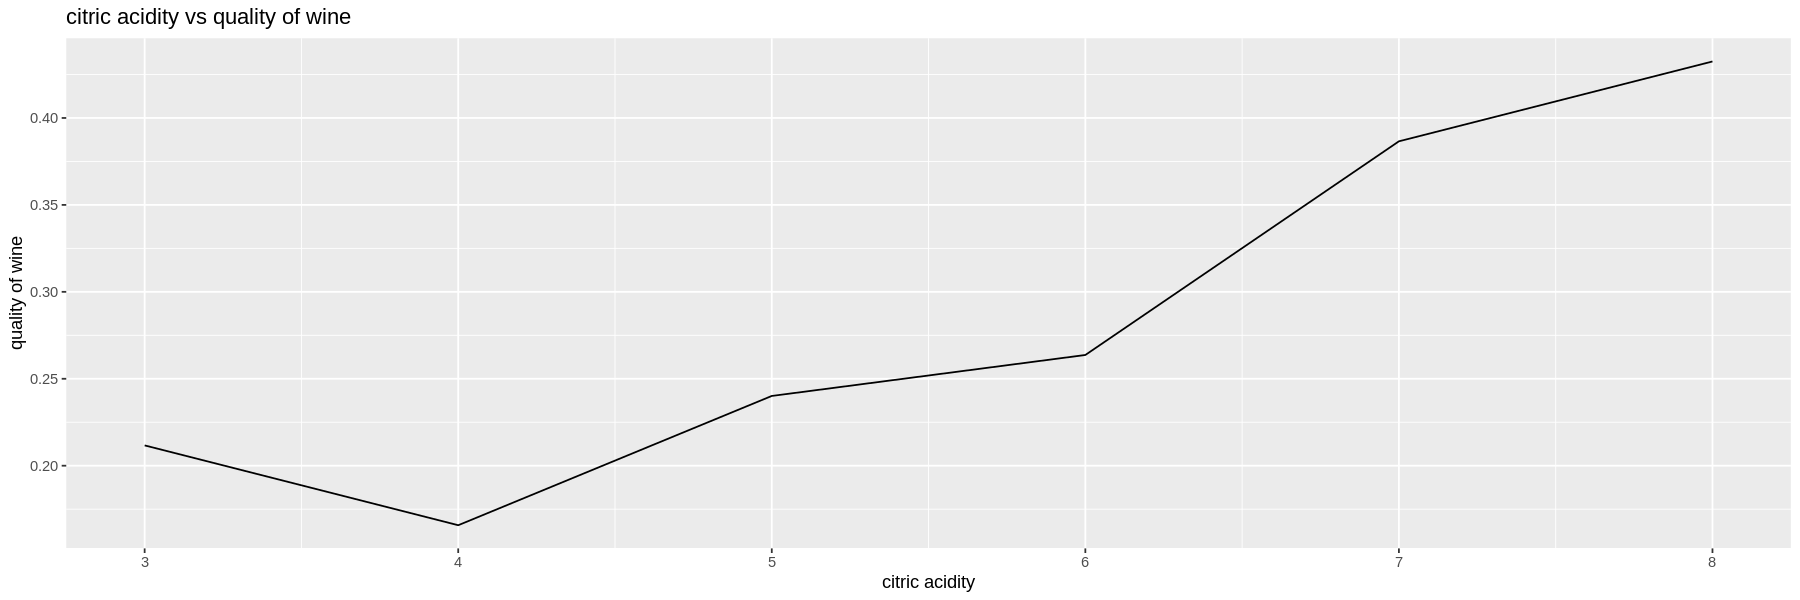

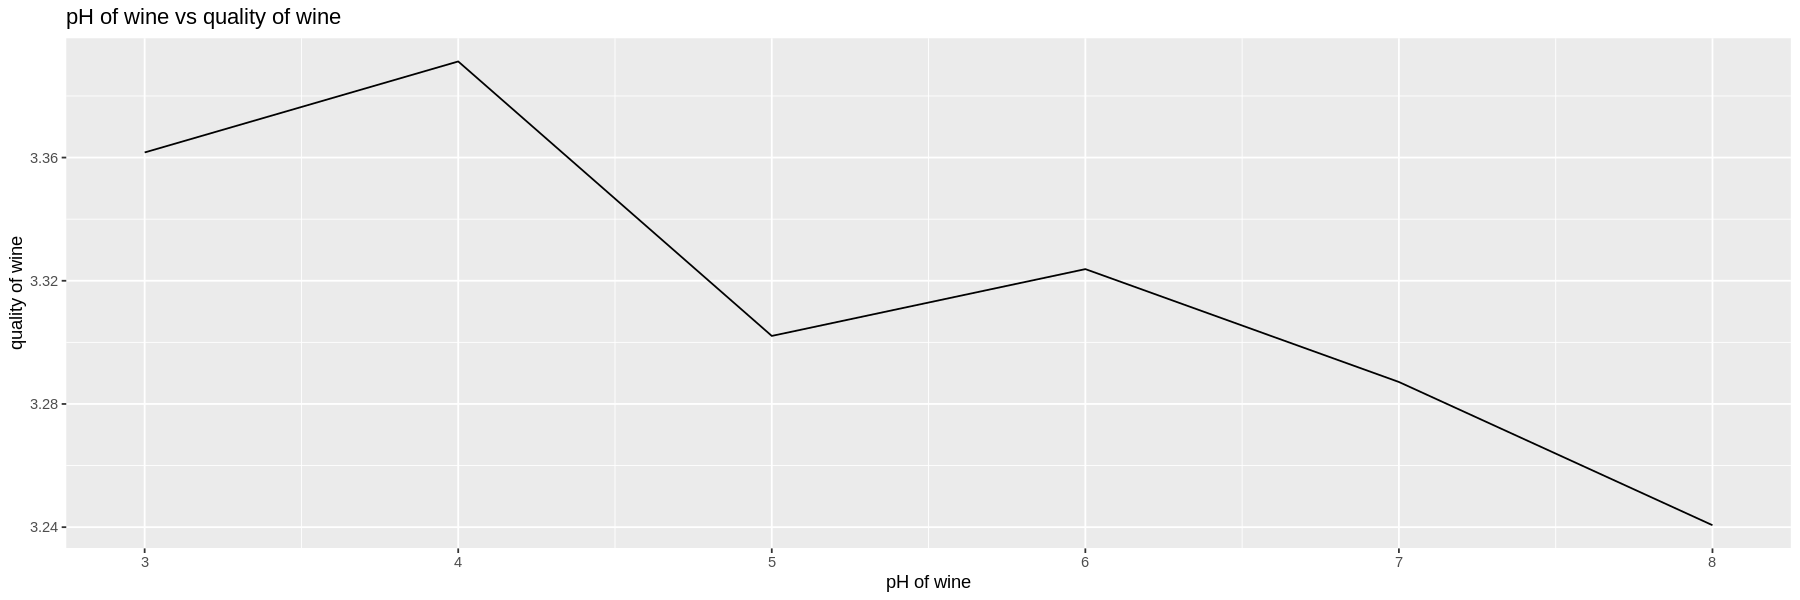

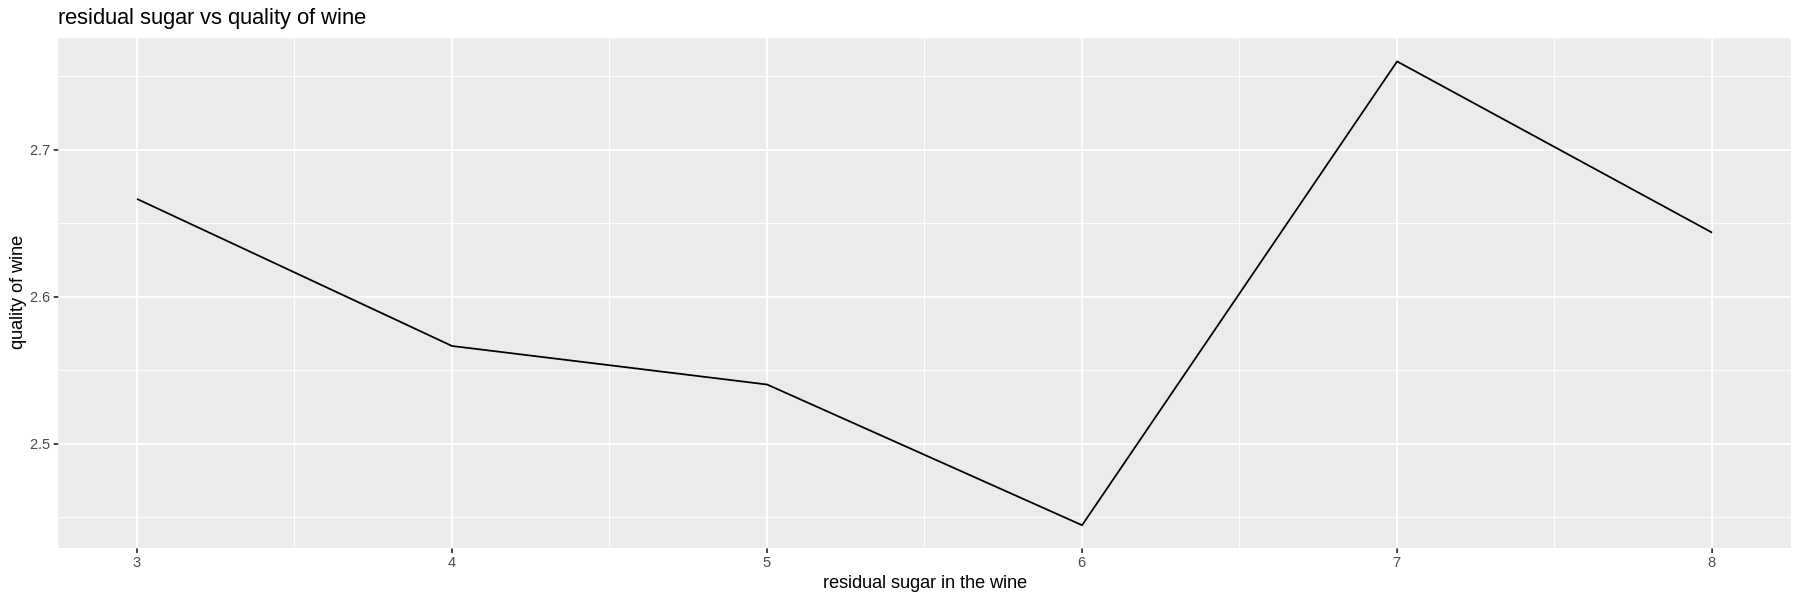

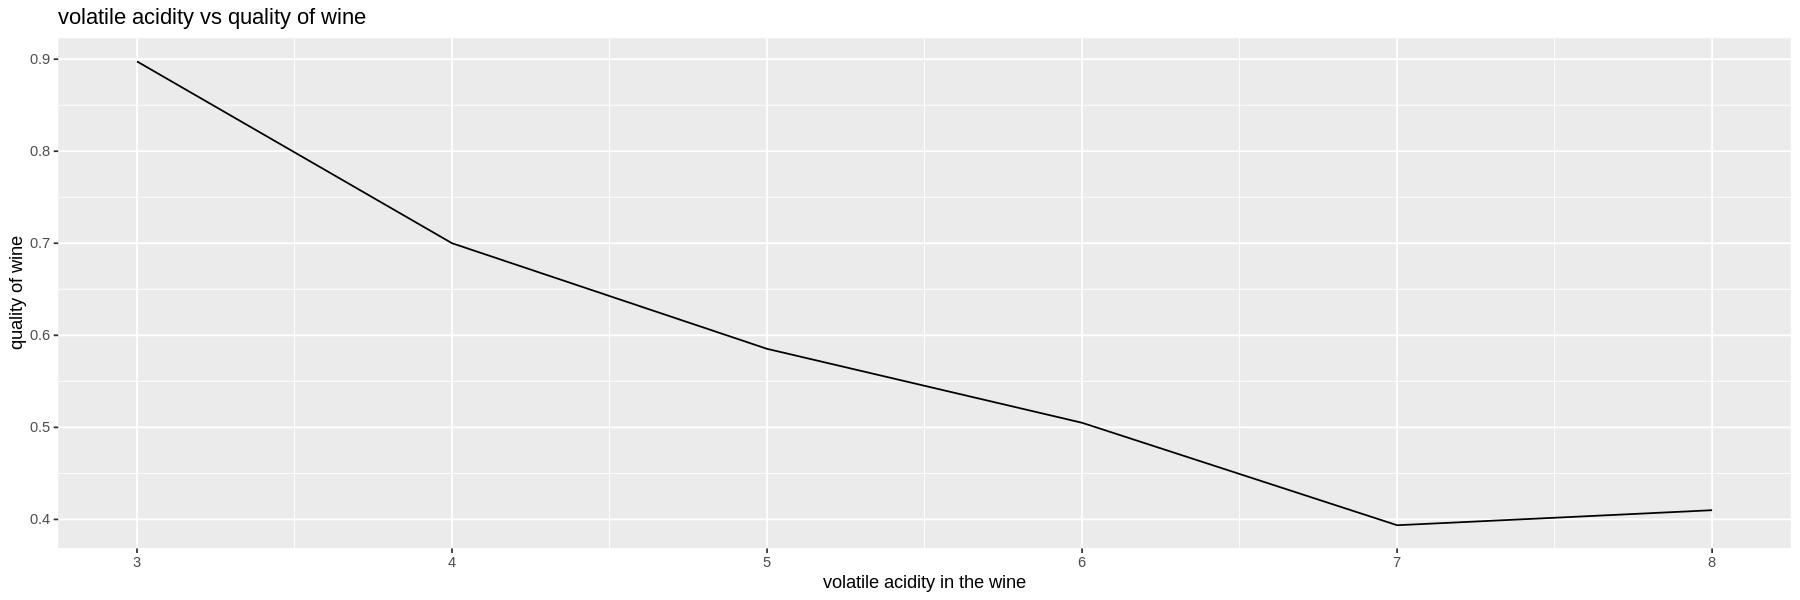

In [19]:
c_acid_plot <- wine %>% group_by(quality) %>%
                            summarise(citric.acid = mean(citric.acid)) %>%
                        ggplot(aes(x= quality, y = citric.acid)) + geom_line() +
                        labs(x = "citric acidity", y = "quality of wine") +
                        ggtitle("citric acidity vs quality of wine")

pH_plot <- wine %>% group_by(quality) %>%
                            summarise(pH = mean(pH)) %>%
                        ggplot(aes(x= quality, y = pH)) + geom_line() +
                        labs(x = "pH of wine", y = "quality of wine") +
                        ggtitle("pH of wine vs quality of wine")


sugar_plot <- wine %>% group_by(quality) %>%
                            summarise(sugar = mean(residual.sugar)) %>%
                        ggplot(aes(x= quality, y = sugar)) + geom_line() +
                        labs(x = "residual sugar in the wine", y = "quality of wine") +
                        ggtitle("residual sugar vs quality of wine")

v_acid_plot <- wine %>% group_by(quality) %>%
                            summarise(v_acid = mean(volatile.acidity)) %>%
                        ggplot(aes(x= quality, y = v_acid)) + geom_line() +
                        labs(x = "volatile acidity in the wine", y = "quality of wine") +
                        ggtitle("volatile acidity vs quality of wine")

c_acid_plot
pH_plot
sugar_plot
v_acid_plot

Based on all the plots above, all predictors seem to be changing with the quality of the wine and all of them will be used for the classification model.

## **Cross validation plot to find the k neighbour**

! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9278910,5,0.008412382,Model01
2,accuracy,multiclass,0.9278910,5,0.008412382,Model02
3,accuracy,multiclass,0.9022817,5,0.007211597,Model03
4,accuracy,multiclass,0.9011121,5,0.005817928,Model04
5,accuracy,multiclass,0.8906264,5,0.008705453,Model05
6,accuracy,multiclass,0.8917824,5,0.008955491,Model06
7,accuracy,multiclass,0.8824933,5,0.011389317,Model07
8,accuracy,multiclass,0.8848460,5,0.013511450,Model08
9,accuracy,multiclass,0.8720617,5,0.012576141,Model09


[1] 1

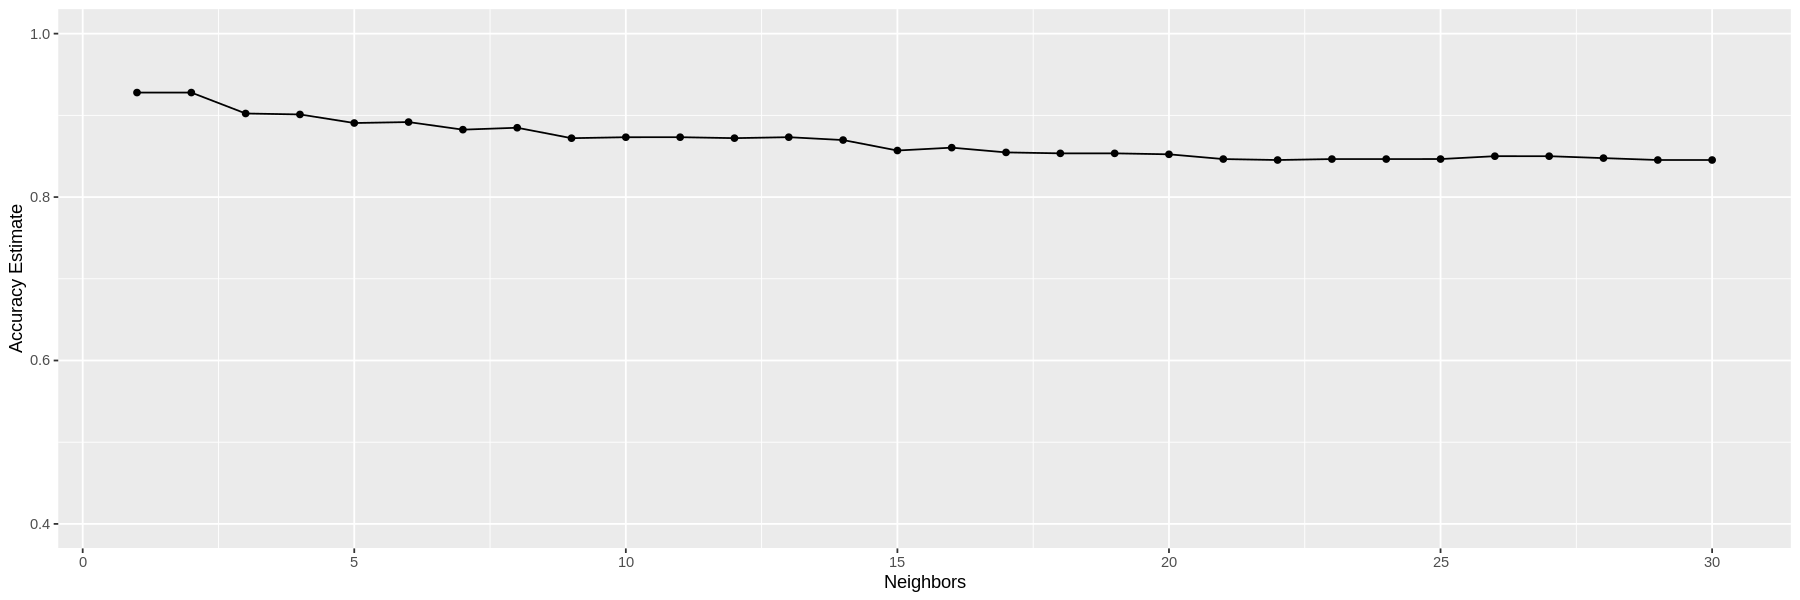

In [20]:
set.seed(5)

## selected predictors
wine <- wine %>% mutate(qual = as_factor(quality))

## Training the Data

wine_split <- initial_split(wine, prop = 0.75, strata = qual)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

## recipe
wine_recipe <- recipe(qual ~ ., data = wine_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) 

## cross validation plot to find the k-neighbours with the highest accuracy

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn")%>%
    set_mode("classification")

wine_vfold <- vfold_cv(wine_train, v = 5, strata = qual)

k_vals <- tibble(neighbors = seq(from = 1, to = 30))

wine_resample_fit <- workflow() %>%
                add_recipe(wine_recipe) %>%
                add_model(knn_spec) %>%
                tune_grid(resamples = wine_vfold, grid = k_vals) %>%
                collect_metrics() %>%
                filter(.metric == "accuracy")

#mutating the file to show the actual neighbour count
wine_resample_fit

wine_crossval_plot <- cross_val_plot <-  ggplot(wine_resample_fit, aes(x = neighbors, y = mean))+
               geom_point() +
               geom_line() +
               labs(x = "Neighbors", y = "Accuracy Estimate") +
               scale_x_continuous(breaks = seq(0, 100, by = 5)) +  # adjusting the x-axis
                scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
                
wine_crossval_plot

k_max <- wine_resample_fit %>% arrange(desc(mean)) %>% slice(1) %>% pull(neighbors) #neighbour with highest accuracy
k_max

The training model was run through a cross validation where the training data is divided into 5 chunks and then it goes through the following process: one of the chunks acts as the testing data and the other 4 as the training data, then the testing and training data switch and the process is done 5 times. The mean accuracy of all the 5 processes is used as that k-value's accuracy. This is then repeated for all k values listed. 5 folds were chosen to not overfit or underfit the data (as it was the one reccomended to us by the instructors). The cross validation was run for 1-30 k values to find the highest accuracy, it was chosen based on a parabolic trend of the graph (decreasing for lower or higher values showing that this range covers underfit, exact fit and overfit).

## **Training the model with k_max neighbour and finding the accuracy**

In [21]:
set.seed(5)

## training the model with k_min
    
wine_spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) %>%
                set_engine("kknn")%>%
                set_mode("classification")

wine_model_1 <- workflow() %>%
                add_recipe(wine_recipe) %>%
                add_model(wine_spec_1) %>%
                fit(data = wine_train)

## testing the accuracy

wine_predict_1 <- predict(wine_model_1, wine_test) %>%
                    bind_cols(wine_test) %>%
                    metrics(truth = qual, estimate = .pred_class) %>%
                    filter(.metric == "accuracy")


wine_confmat_1 <- predict(wine_model_1, wine_test) %>%
                    bind_cols(wine_test) %>%
                    conf_mat(truth = qual, estimate = .pred_class)

wine_predict_1
wine_confmat_1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9542254


          Truth
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   5   0   0   0   0
         5   0   4 120   1   0   0
         6   0   0   3 112   2   0
         7   0   0   0   1  34   2
         8   0   0   0   0   0   0

The model was then trained with the k neighbour value that provided the highest accuracy in the cross validation. However, when tested on the testing data, it provided approximately 93 % accuracy which is good. When looking at the accuracy on the testing data set, the accuracy went up to 95% which should be good enough to be used as a preliminary method for the uses mentioned beforehand. When looking at the confusion metrics, one can see that the classifier is getting confusing quality of 4 as quality of 5. This is could be due to the low amount of number of data sets with quality of 4 (which can also be seen when looking at the confusion matrix as it only shows 9 data points with quality of 4). Even though the accuracy is good, it can be improved a lot by increasing the size of data and allowing it to cover even a larger range of quality scores such as more 3,4 and 8 quality scores.

## Future Questions:
- What further research can be done to apply this data analysis to compare the popularity of certain wines?
- How can wineries adjust their business model and inventory to account for the classification of better quality wines?
- The classifier could be adapted further (if more data and attributes is provided) to classify the type of wine too. 



## **Bibliography**

https://www.mdpi.com/1420-3049/20/5/8453/pdf